REF : https://github.com/ryuichiueda/probrobo2017/blob/master/04.ipynb

In [1]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt

# Landmarks

In [2]:
actual_landmarks = [np.array([-0.5,0.0]),np.array([0.5,0.0]),np.array([0.0,0.5])]

def draw_landmarks(landmarks):
    xs = [ e[0] for e in landmarks]
    ys = [ e[1] for e in landmarks]
    plt.scatter(xs,ys,s=300,marker="*",label="landmarks",color="orange")

# Robot Position

In [3]:
actual_x = np.array([0.3, 0.2, np.deg2rad(20)])
def draw_robot(pose):
    plt.quiver([pose[0]],[pose[1]],[math.cos(pose[2])],[math.sin(pose[2])],color="red",label="actual robot motion")

In [4]:
def relative_landmark_pos(pose,landmark):
    x, y, theta = pose
    lx, ly = landmark
    distance = math.sqrt((x - lx)**2 + (y - ly)**2)
    direction = math.atan2(ly - y, lx - x) - theta
    
    return (distance, direction, lx, ly)

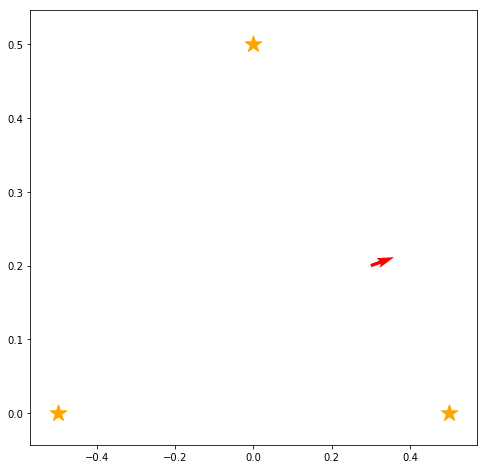

In [5]:
fig, world = plt.subplots(figsize=(8, 8))
draw_landmarks(actual_landmarks)
draw_robot(actual_x)
plt.show()

In [6]:
measurements = [ relative_landmark_pos(actual_x,e) for e in actual_landmarks]
print(measurements)

[(0.8246211251235323, -3.2456798408617948, -0.5, 0.0), (0.28284271247461906, -1.1344640137963142, 0.5, 0.0), (0.4242640687119285, 2.0071286397934789, 0.0, 0.5)]


In [7]:
def draw_observation(pose, measurement):
    x, y, theta = pose
    distance, direction, lx, ly = measurement
    lx = distance * math.cos(theta + direction) + x
    ly = distance * math.sin(theta + direction) + y
    plt.plot([pose[0], lx], [pose[1], ly], color="pink")
    
def draw_observations(pose, measurements):
    for m in measurements:
        draw_observation(pose, m)

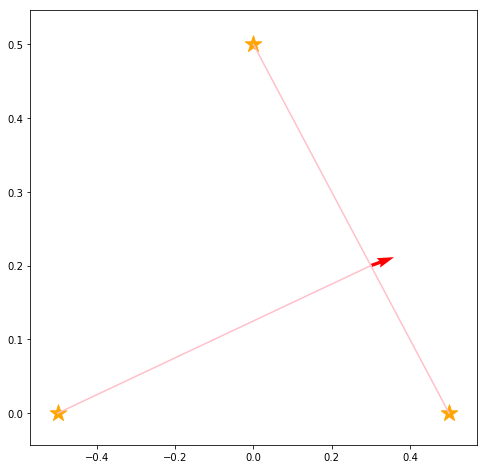

In [8]:
fig, world = plt.subplots(figsize=(8, 8))
draw_landmarks(actual_landmarks)
draw_robot(actual_x)
draw_observations(actual_x, measurements)
plt.show()

In [9]:
def observation(pose, landmark):
    actual_distance,actual_direction,lx,ly = relative_landmark_pos(pose,landmark)
    if (math.cos(actual_direction) < 0.0):
        return None
    measured_distance = random.gauss(actual_distance, actual_distance * 0.1)
    measured_direction = random.gauss(actual_direction, np.deg2rad(5))
    return (measured_distance, measured_direction, lx, ly)

def observations(pose, landmarks):
    measurements = []
    for landmark in landmarks:
        measurement = observation(pose, landmark)
        if measurement == None:
            pass
        else:
            measurements.append(measurement)
    return measurements

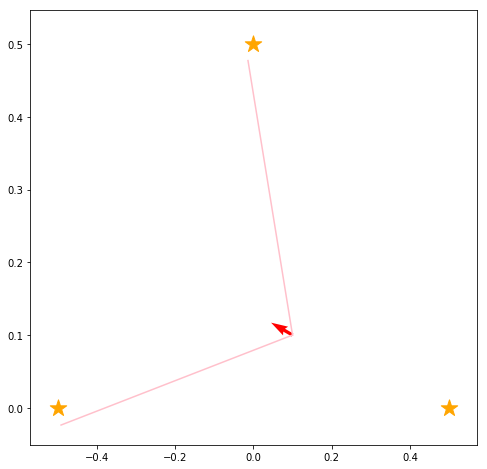

In [10]:
fig, world = plt.subplots(figsize=(8, 8))
actual_x = np.array([0.1,0.1,np.deg2rad(150)])
measurements = observations(actual_x, actual_landmarks)

draw_landmarks(actual_landmarks)
draw_robot(actual_x)
draw_observations(actual_x, measurements)
plt.show()

In [11]:
class Particle:
    def __init__(self,w):
        self.pose = np.array([0.0,0.0,0.0])
        self.weight = w
    
    def __repr__(self):
        return "pose: " + str(self.pose) + " weight: " + str(self.weight)
        

def f(x_old,u):
    pos_x, pos_y, pos_theta = x_old
    act_fw, act_rot = u
    
    act_fw = random.gauss(act_fw,act_fw/10)
    dir_error = random.gauss(0.0, np.deg2rad(3.0))
    act_rot = random.gauss(act_rot,act_rot/10)
    
    pos_x += act_fw * math.cos(pos_theta + dir_error)
    pos_y += act_fw * math.sin(pos_theta + dir_error)
    pos_theta += act_rot
    
    return np.array([pos_x,pos_y,pos_theta])


def draw(pose,particles):    
    fig = plt.figure(i,figsize=(8, 8))
    sp = fig.add_subplot(111, aspect='equal')
    sp.set_xlim(-1.0,1.0)
    sp.set_ylim(-0.5,1.5)
    
    xs = [e.pose[0] for e in particles]
    ys = [e.pose[1] for e in particles]
    vxs = [math.cos(e.pose[2])*e.weight for e in particles]  #重みで長さを変えるようにしましょう
    vys = [math.sin(e.pose[2])*e.weight for e in particles]  #重みで長さを変えるようにしましょう
    plt.quiver(xs,ys,vxs,vys,color="blue",label="particles")
    
    plt.quiver([pose[0]],[pose[1]],[math.cos(pose[2])],[math.sin(pose[2])],color="red",label="actual robot motion")

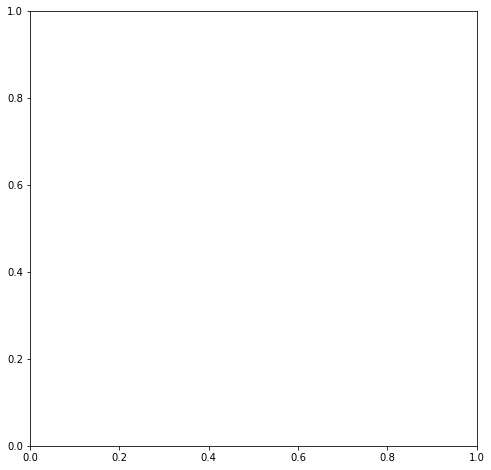

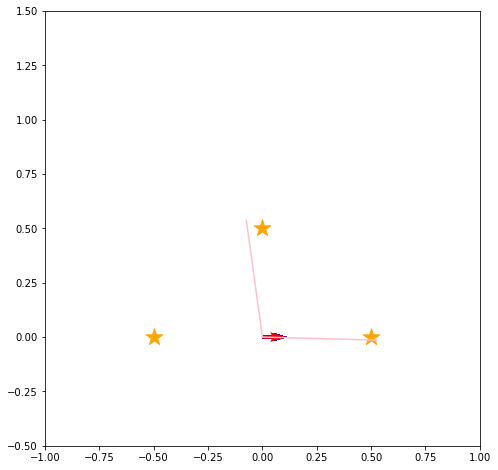

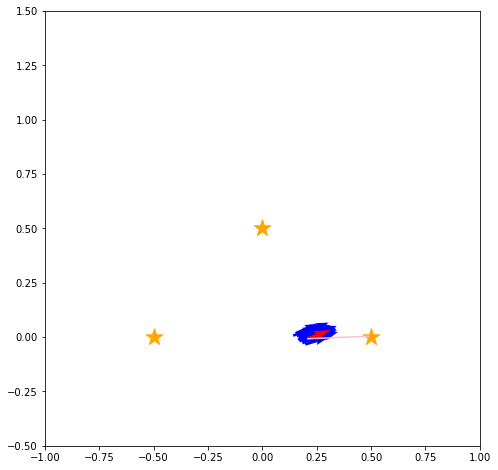

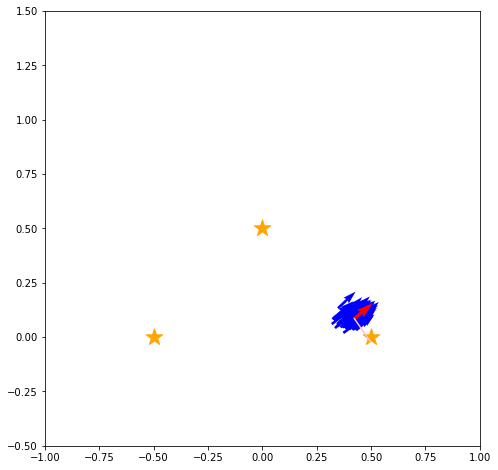

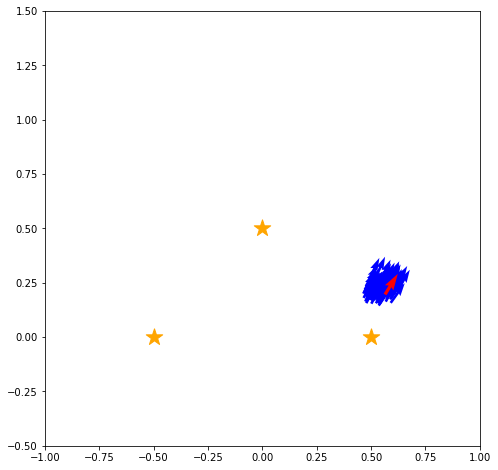

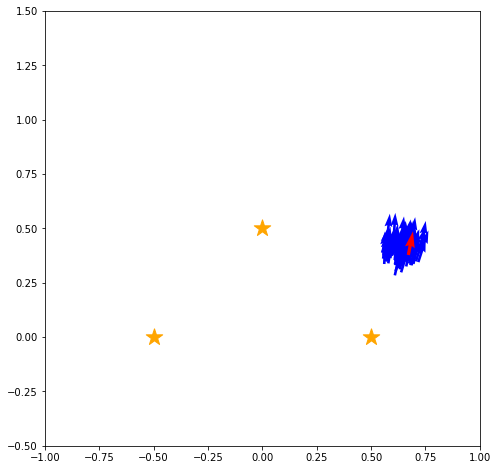

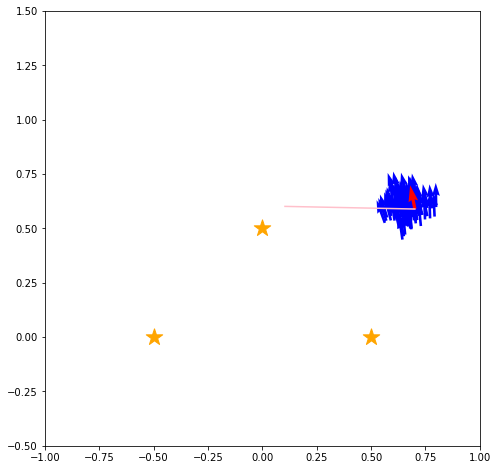

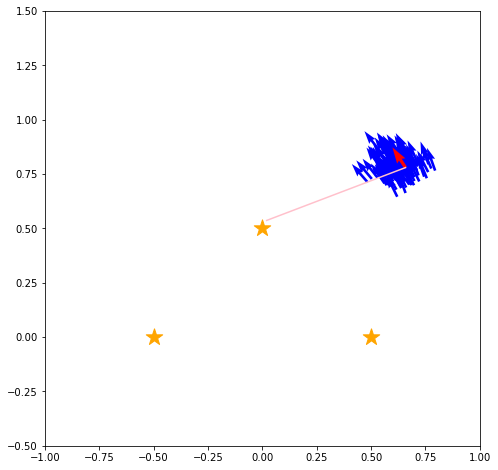

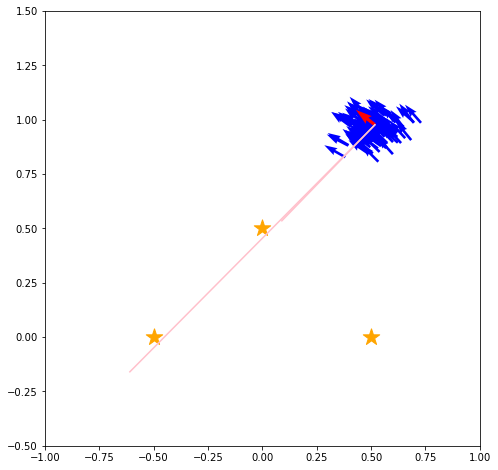

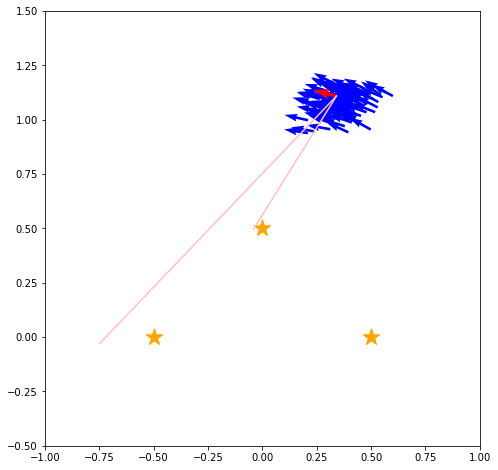

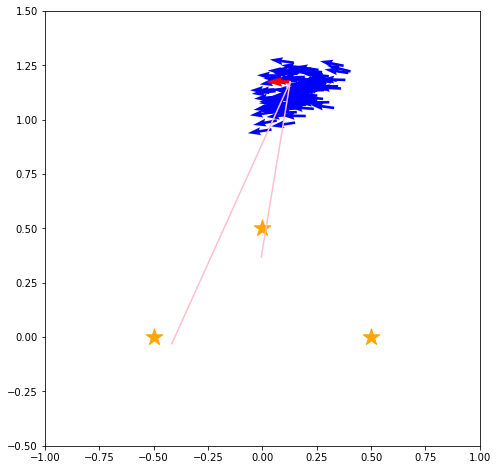

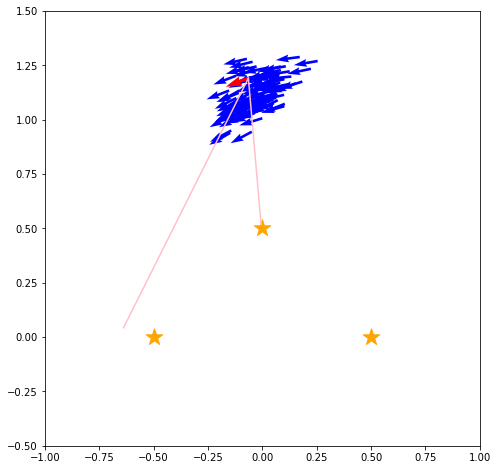

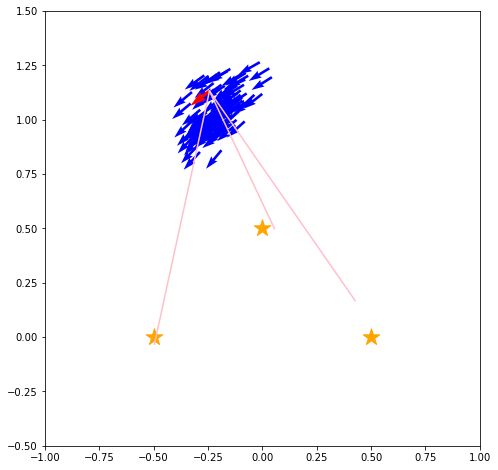

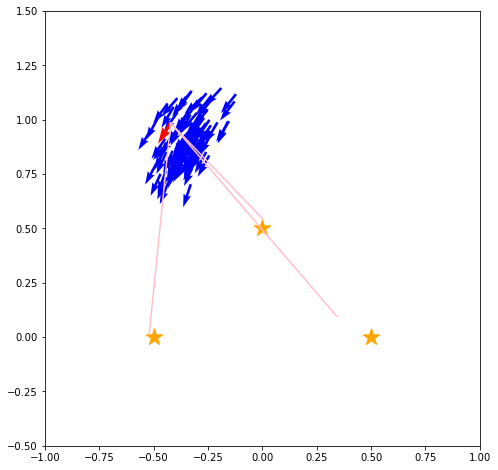

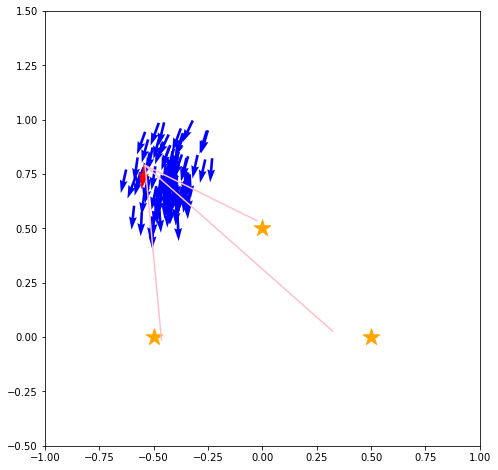

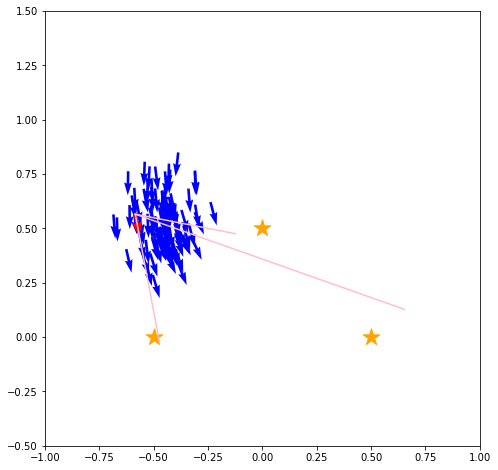

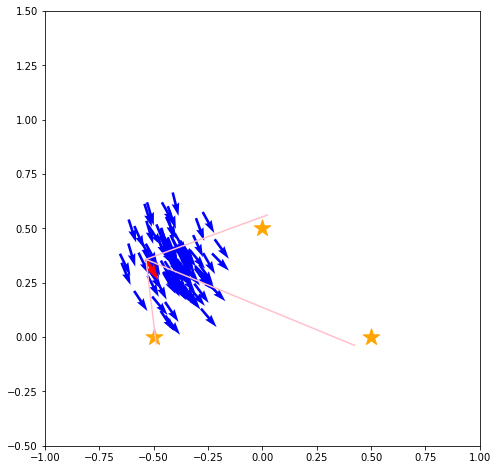

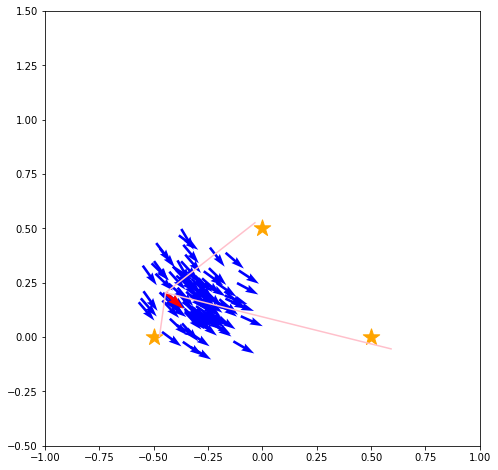

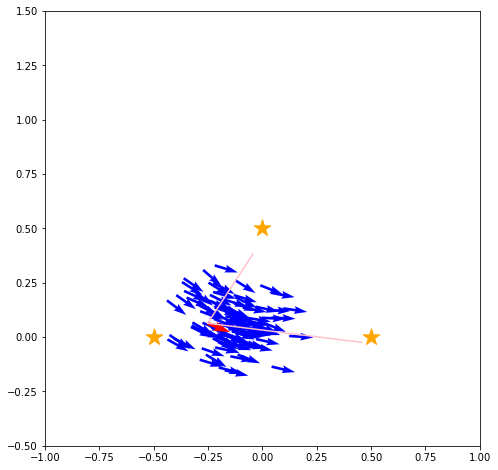

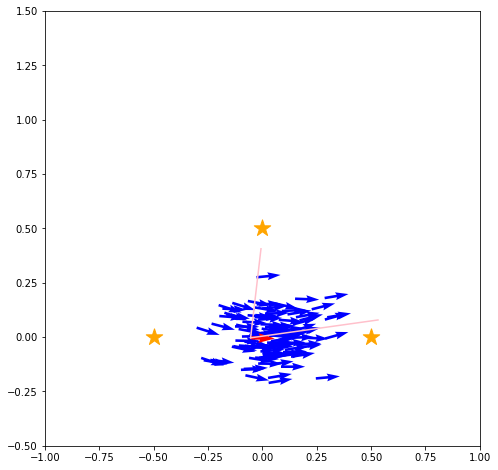

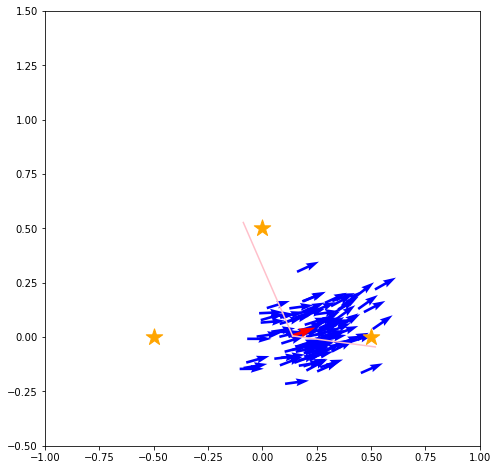

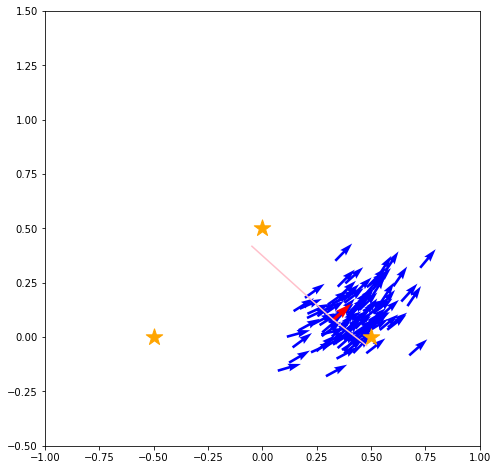

In [12]:
fig, world = plt.subplots(figsize=(8, 8))
actual_x = np.array([0.0,0.0,0.0])   #ロボットの実際の姿勢
particles = [Particle(1.0/100) for i in range(100)]
u = np.array([0.2,math.pi / 180.0 * 20]) #ロボットの移動

import copy

path = [actual_x]
particle_path = [copy.deepcopy(particles)]
measurementss = [observations(actual_x, actual_landmarks)]
for i in range(20):
    actual_x = f(actual_x,u)
    path.append(actual_x)
    measurementss.append(observations(actual_x,actual_landmarks))

    for p in particles:
        p.pose = f(p.pose,u)
    particle_path.append(copy.deepcopy(particles))

for i,p in enumerate(path):
    draw(path[i],particle_path[i])
    draw_landmarks(actual_landmarks)
    draw_observations(path[i],measurementss[i])
    plt.show()